# 2024-2 언어데이터과학 21강 (2024-12-05) 실습: scikit-learn 패키지와 로지스틱 회귀분석 분류기 훈련

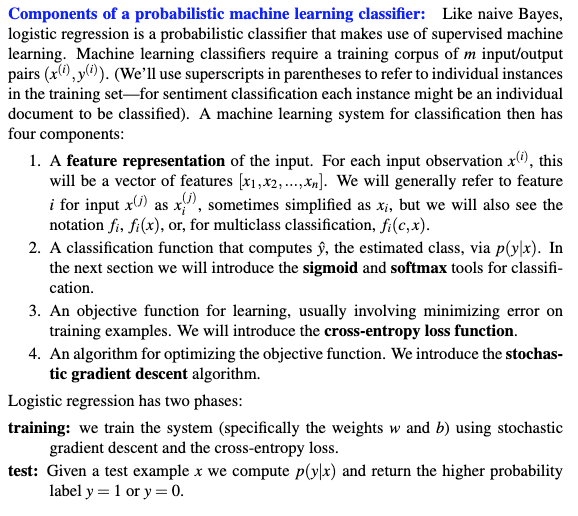

## 0. 데이터

### IMDB Reviews

In [ ]:
!wget https://github.com/LawrenceDuan/IMDb-Review-Analysis/raw/master/IMDb_Reviews.csv

--2021-11-29 03:42:08--  https://github.com/LawrenceDuan/IMDb-Review-Analysis/raw/master/IMDb_Reviews.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv [following]
--2021-11-29 03:42:08--  https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘IMDb_Reviews.csv’

IMDb_Reviews.csv    100%[===================>]  62.81M   150MB/s    in 0.4s    

2021-11-29 03:42:09 (150 MB/s) - ‘IMDb_Reviews.csv’ saved [65862309/65862

In [ ]:
!wc IMDb_Reviews.csv

   50001 11554739 65862309 IMDb_Reviews.csv


In [ ]:
!head IMDb_Reviews.csv

review,sentiment
"My family and I normally do not watch local movies for the simple reason that they are poorly made, they lack the depth, and just not worth our time.<br /><br />The trailer of ""Nasaan ka man"" caught my attention, my daughter in law's and daughter's so we took time out to watch it this afternoon. The movie exceeded our expectations. The cinematography was very good, the story beautiful and the acting awesome. Jericho Rosales was really very good, so's Claudine Barretto. The fact that I despised Diether Ocampo proves he was effective at his role. I have never been this touched, moved and affected by a local movie before. Imagine a cynic like me dabbing my eyes at the end of the movie? Congratulations to Star Cinema!! Way to go, Jericho and Claudine!!",1
"Believe it or not, this was at one time the worst movie I had ever seen. Since that time, I have seen many more movies that are worse (how is it possible??) Therefore, to be fair, I had to give this movie a 2 out of 1

## 1. 통계적 분류기

### 1. 0. 준비

#### 영화평 데이터 읽기

In [ ]:
import pandas as pd
data = pd.read_csv('IMDb_Reviews.csv')

In [ ]:
data.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


#### 훈련 집합과 실험 집합으로 분할하기

In [ ]:
# 시간 관계상 일부만 사용
train_data = data[:1000]
test_data = data[-100:]

# 실제 데이터 분할
# train_data = data[:25000]
# test_data = data[25000:]

### 1. 1. 벡터 표현 (Vector representation)

#### 범주(반응변수)

In [ ]:
y = train_data['sentiment'].copy()
print(y.value_counts())

1    513
0    487
Name: sentiment, dtype: int64


#### 특성값(설명변수) 정의하기

TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1,1)) # ngram_range=(1,1)...유니그램만 사용
# vectorizer = TfidfVectorizer(ngram_range=(1,2)) # ngram_range=(1,2)...유니그램+바이그램
# vectorizer = TfidfVectorizer(ngram_range=(1,3)) # ngram_range=(1,3)...유니그램+바이그램+트라이그램
vectorizer = TfidfVectorizer(lowercase=False) # lowercase=False...대소문자 구별 유지
# vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,3))

In [ ]:
# help(vectorizer)

#### 특성값 추출하기

In [ ]:
x = vectorizer.fit_transform(train_data['review'])

In [ ]:
print(type(x))
print(x.shape) # 유니그램 (1000, 18749)
# lowercase=False...The와 the가 서로 다른 단어인 것으로 취급.
# print(x)

<class 'scipy.sparse.csr.csr_matrix'>
(1000, 21430)


# 훈련

훈련 집합을 훈련 집합과 개발 집합(held-out dataset, development dataset, validation dataset)으로 분리한다.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [ ]:
model.fit(x_train, y_train) # 훈련 집합에서 훈련

LogisticRegression(random_state=0)

In [ ]:
model.score(x_dev, y_dev) # 개발 집합에서 평가

0.825

+ 유니그램(대소문자 구별 안 함): 0.82
+ 유니그램(대소문자 구별함): 0.825
+ 유니그램+바이그램: 0.815
+ 유니그램+바이그램+트라이그램: 0.825
+ 유니그램+바이그램+트라이그램(대소문자 구별함): 0.815

# 실험 및 평가

In [ ]:
y_test = test_data['sentiment'].copy()

In [ ]:
x_test = vectorizer.transform(test_data['review'])

In [ ]:
true = y_test # 정답
pred = model.predict(x_test) # 예측

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(true, pred))

0.87


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(true, pred))

[[52  9]
 [ 4 35]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        61
           1       0.80      0.90      0.84        39

    accuracy                           0.87       100
   macro avg       0.86      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100

